# Try this exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In this exercise, you can play with the "digits" data set.  That can be loaded from sklearn as shown below.

*At a minimum* do the classification experiment on this data set as above using the default values.

If you feel like it, you can try to optimize the classifier by varying the parameters (including learning rate, if you want to).  Do stick with the same basic architecture, though.  Perhaps we could have a competition for the most efficient classifier?

In [2]:
digits = load_digits()

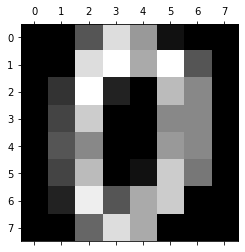

In [3]:
# example image
fig, ax = plt.subplots()
ax.matshow(digits.images[0], cmap='gray')
plt.show()

It turns out that `digits` is a dictionary with:
- data - this has the data in vectorized form, so we'll use that.
- DESCR
- images - this is the data as an 8x8 image
- target - the target - we'll use this too.
- target_names - the target names = target.

### Answer:

Here I have trained the same `Sequential` model as given in the lecture notebook on the digits data set (raw images). I then tested the accuracy against the last 40% of the data, and I find that this model has about a 97.7% accuracy (which is not terrible) with just the default values of optimizer parameters, etc.. I've also provided a plot of which digits were misclassified the most/least as a fraction of all images that were misclassified.

In [4]:
# create and compile model
n_digits = 10
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(n_digits)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
# train the model
scale = StandardScaler()
scaled_data = scale.fit_transform(digits.data)
X_train, X_test, y_train, y_test = \
    train_test_split(scaled_data, digits.target,
                     test_size=0.4, random_state=42)

model.fit(X_train, y_train, epochs=10, verbose=0)

In [6]:
# test the model
test_loss, test_accuracy = model.evaluate(X_test,  y_test, verbose=2)

y_predict = np.argmax(model.predict(X_test), axis=-1)
diff = np.abs(y_predict - y_test)
missed_mask = diff != 0

23/23 - 0s - loss: 0.1147 - accuracy: 0.9777


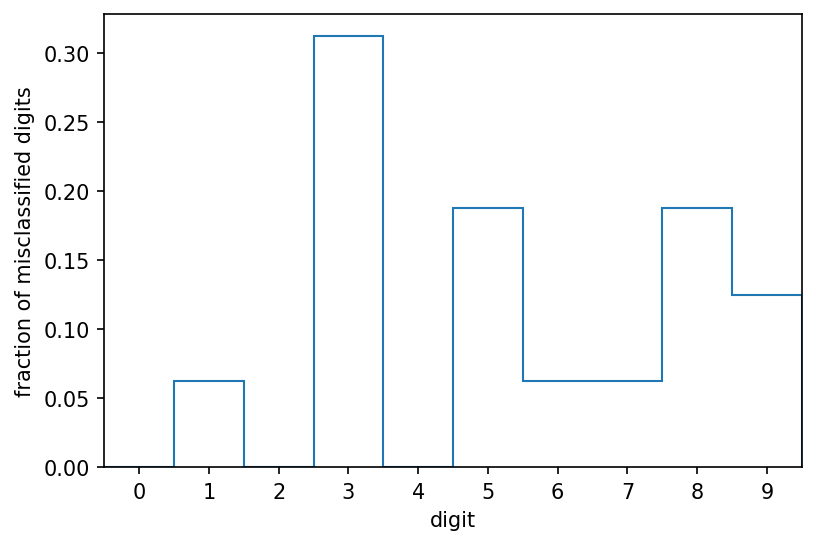

In [7]:
fig, ax = plt.subplots(dpi=150)

bins = np.linspace(-0.5, n_digits + 0.5, 12)
ax.hist(y_test[missed_mask], bins=bins, histtype='step', density=True)

ax.set_xlim(-0.5, n_digits - 0.5)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel('digit')
ax.set_ylabel('fraction of misclassified digits')

plt.show()